### RNN for weather prediction

#### 1. Pre Processing

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
outside_data = pd.read_csv("outside_weather_history.csv")

In [ ]:
indoor_data  = pd.read_excel("indoor_temphumd_value.xlsx")

In [ ]:
indoor_data.columns = indoor_data.iloc[0]

In [ ]:
indoor_data.drop(indoor_data.index[0],inplace = True)

In [ ]:
data = outside_data.copy()

In [ ]:
data ['Indoor_Temperature'] = indoor_data["Temperatre "]
data ['Indoor_Humidity']    = indoor_data["Humidity"]

In [ ]:
data.head()

,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity,Conditions,Indoor_Temperature,Indoor_Humidity
0,1/1/2019,73.4,59.7,66.9,NaN,NaN,0.0,NaN,11.1,NaN,21.4,71.24,Clear,NaN,NaN
1,1/2/2019,75.6,62.0,68.3,NaN,NaN,0.0,NaN,13.4,NaN,31.2,74.18,Partially cloudy,20,34
2,1/3/2019,81.7,65.5,72.5,NaN,80.7,0.0,NaN,24.4,NaN,8.1,63.04,Clear,20.5,30
3,1/4/2019,72.0,58.9,66.1,NaN,NaN,0.0,NaN,19.8,NaN,1.0,57.22,Clear,20,30
4,1/5/2019,72.6,53.6,61.6,NaN,NaN,0.0,NaN,16.4,NaN,0.5,64.74,Clear,22,35


In [ ]:
data['Date time'] = pd.to_datetime(outside_data['Date time'])

In [ ]:
data['year'] = pd.DatetimeIndex(outside_data['Date time']).year

In [ ]:
data['month'] = pd.DatetimeIndex(outside_data['Date time']).month
data['day']   = pd.DatetimeIndex(outside_data['Date time']).day

In [ ]:
data.isna().sum()

Date time                0
Maximum Temperature      3
Minimum Temperature      3
Temperature              3
Wind Chill             445
Heat Index             195
Precipitation            3
Snow Depth             455
Wind Speed               3
Wind Gust              456
Cloud Cover              3
Relative Humidity        3
Conditions               3
Indoor_Temperature       1
Indoor_Humidity          1
year                     0
month                    0
day                      0
dtype: int64

In [ ]:
conditions = data["Conditions"]

In [ ]:
data.drop(columns = ["Conditions"],inplace = True)

In [ ]:
data.set_index('Date time',inplace = True)

In [ ]:
data.interpolate(method='time', axis=0,inplace = True)

In [ ]:
data.isna().sum()

Maximum Temperature      0
Minimum Temperature      0
Temperature              0
Wind Chill              19
Heat Index               2
Precipitation            0
Snow Depth             323
Wind Speed               0
Wind Gust              456
Cloud Cover              0
Relative Humidity        0
Indoor_Temperature       1
Indoor_Humidity          1
year                     0
month                    0
day                      0
dtype: int64

In [ ]:
data.drop(columns = ["Wind Gust","Snow Depth","Precipitation"],inplace = True)

In [ ]:
data.isna().sum()

Maximum Temperature     0
Minimum Temperature     0
Temperature             0
Wind Chill             19
Heat Index              2
Wind Speed              0
Cloud Cover             0
Relative Humidity       0
Indoor_Temperature      1
Indoor_Humidity         1
year                    0
month                   0
day                     0
dtype: int64

In [ ]:
data.fillna(method = "bfill",inplace = True)

In [ ]:
data.isna().sum()

Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Wind Chill             0
Heat Index             0
Wind Speed             0
Cloud Cover            0
Relative Humidity      0
Indoor_Temperature     0
Indoor_Humidity        0
year                   0
month                  0
day                    0
dtype: int64

In [ ]:
data["Conditions"] = list(conditions)

In [ ]:
one_hot = pd.get_dummies(data['Conditions'])

In [ ]:
data = data.drop('Conditions',axis = 1)

In [ ]:
data = data.join(one_hot)

In [ ]:
data.interpolate(method='pad',inplace = True)

In [ ]:
data.isna().sum()

Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Wind Chill             0
Heat Index             0
Wind Speed             0
Cloud Cover            0
Relative Humidity      0
Indoor_Temperature     0
Indoor_Humidity        0
year                   0
month                  0
day                    0
Clear                  0
Overcast               0
Partially cloudy       0
dtype: int64

In [ ]:
data.corr()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Wind Speed,Cloud Cover,Relative Humidity,Indoor_Temperature,Indoor_Humidity,year,month,day,Clear,Overcast,Partially cloudy
Maximum Temperature,1.000000,0.949745,0.987301,-0.232261,0.932760,0.061474,-0.348403,-0.668558,0.727340,0.704085,-0.461250,0.449649,0.000229,0.227160,-0.127753,-0.195744
Minimum Temperature,0.949745,1.000000,0.983850,-0.271353,0.915532,0.157583,-0.191734,-0.579139,0.700182,0.705883,-0.485653,0.482105,-0.009972,0.091000,-0.034894,-0.099932
Temperature,0.987301,0.983850,1.000000,-0.244474,0.933659,0.114961,-0.277160,-0.644352,0.728478,0.717379,-0.475835,0.464466,-0.006032,0.163148,-0.085165,-0.151901
Wind Chill,-0.232261,-0.271353,-0.244474,1.000000,-0.286620,0.110936,0.111604,-0.037971,-0.028745,-0.153605,0.585458,-0.639419,-0.001663,-0.125319,-0.075436,0.160953
Heat Index,0.932760,0.915532,0.933659,-0.286620,1.000000,0.030236,-0.341974,-0.543523,0.703713,0.664707,-0.431040,0.449861,0.011778,0.245024,-0.099837,-0.224251
Wind Speed,0.061474,0.157583,0.114961,0.110936,0.030236,1.000000,0.170401,-0.280153,0.148122,0.062488,0.022915,-0.196541,-0.116745,-0.135100,0.051992,0.138790
Cloud Cover,-0.348403,-0.191734,-0.277160,0.111604,-0.341974,0.170401,1.000000,0.437480,-0.236715,-0.117057,0.073072,-0.101713,-0.039822,-0.859732,0.523863,0.723650
Relative Humidity,-0.668558,-0.579139,-0.644352,-0.037971,-0.543523,-0.280153,0.437480,1.000000,-0.572768,-0.524525,0.231692,-0.106095,0.087948,-0.307952,0.226270,0.246793
Indoor_Temperature,0.727340,0.700182,0.728478,-0.028745,0.703713,0.148122,-0.236715,-0.572768,1.000000,0.652136,-0.366382,0.275455,0.030152,0.113502,-0.073123,-0.118186
Indoor_Humidity,0.704085,0.705883,0.717379,-0.153605,0.664707,0.062488,-0.117057,-0.524525,0.652136,1.000000,-0.427606,0.494436,0.006086,0.070885,0.044570,-0.111192


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)
kmo_model

0.7522889294815499

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
fa = FactorAnalyzer()
fa.fit(data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([6.39353676e+00, 2.68002110e+00, 1.90356676e+00, 1.08572212e+00,
       1.03033231e+00, 8.39895079e-01, 5.32808914e-01, 4.66709367e-01,
       3.55898879e-01, 2.83781781e-01, 2.07534534e-01, 9.45916168e-02,
       6.88607102e-02, 3.44436207e-02, 2.01908969e-02, 2.10555261e-03])

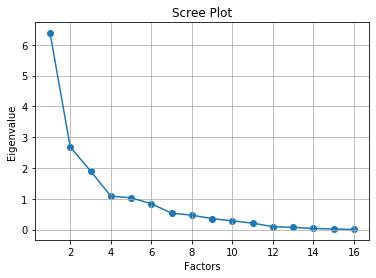

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=5, rotation="varimax")
fa.fit(data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [ ]:
factor_loadings = fa.loadings_

In [ ]:
factor_loadings = pd.DataFrame(factor_loadings)

In [ ]:
factor_loadings.set_index(data.columns,inplace = True)

In [ ]:
factor_loadings

,0,1,2,3,4
Maximum Temperature,0.954740,-0.125311,0.171629,-0.096577,-0.009309
Minimum Temperature,0.934698,-0.005203,0.231391,-0.001698,0.073247
Temperature,0.965056,-0.068654,0.192577,-0.051579,0.039583
Wind Chill,-0.040856,0.100185,-0.995760,-0.014954,-0.006974
Heat Index,0.889365,-0.142888,0.210597,-0.058564,-0.061668
Wind Speed,0.121362,0.085010,-0.121840,0.039406,0.699965
Cloud Cover,-0.211815,0.799375,-0.028185,0.472805,0.130397
Relative Humidity,-0.650917,0.277152,0.084115,0.196172,-0.328682
Indoor_Temperature,0.777277,-0.063931,0.006563,-0.031293,0.078451
Indoor_Humidity,0.754496,-0.016353,0.161374,0.098899,-0.007668


In [ ]:
data.reset_index(drop = True,inplace = True)

In [ ]:
data_2019 = data[data['year'] == 2019]

In [ ]:
data_2020 = data[data['year'] == 2020]

In [ ]:
y_train = data_2019[["Temperature","Relative Humidity","Indoor_Temperature","Indoor_Humidity"]]
#X_train = data_2019[["Heat Index","Wind Chill","Cloud Cover","month","Partially cloudy","Clear","Overcast","Wind Speed"]].copy()
X_train = data_2019.drop(columns = ["Temperature","Relative Humidity","Maximum Temperature","Minimum Temperature","Indoor_Temperature","Indoor_Humidity"])

In [ ]:
y_test = data_2020[["Temperature","Relative Humidity","Indoor_Temperature","Indoor_Humidity"]]
#X_test = data_2020[["Heat Index","Wind Chill","Cloud Cover","month","Partially cloudy","Clear","Overcast","Wind Speed"]].copy()
X_test = data_2020.drop(columns = ["Temperature","Relative Humidity","Maximum Temperature","Minimum Temperature","Indoor_Temperature","Indoor_Humidity"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
scaled_X_train = X_scaler.fit_transform(X_train)
scaled_X_test  = X_scaler.transform(X_test)

#y_scaler = MinMaxScaler()
#scaled_y_train = y_scaler.fit_transform(y_train)
scaled_y_train = y_train.to_numpy()

#### 2. Creating Baseline RNN model

In [ ]:
n_input = 2 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)
print(generator[0][0].shape)

(1, 2, 10)


In [ ]:
from keras.layers import Dropout
from tensorflow.keras.layers import GRU
from keras import optimizers
model = Sequential()
model.add(LSTM(units=32, activation='tanh',recurrent_activation='sigmoid', recurrent_initializer='orthogonal', input_shape=(n_input, n_features), return_sequences=True))
#model.add(Dropout(0.1))
# Second LSTM layer
#model.add(LSTM(units=64, return_sequences=True))
#model.add(Dropout(0.1))
# Fourth LSTM layer
#model.add(LSTM(units=64))
#model.add(Dropout(0.1))
model.add(LSTM(54, return_sequences=False)) 
model.add(Dense(4))
opt = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8,beta_2=0.999,epsilon=1e-07,amsgrad=False,)
model.compile(optimizer=opt, loss=['msle'])
model.summary()


Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_178 (LSTM)              (None, 2, 32)             5504      
_________________________________________________________________
lstm_179 (LSTM)              (None, 54)                18792     
_________________________________________________________________
dense_89 (Dense)             (None, 4)                 220       
Total params: 24,516
Trainable params: 24,516
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=250)

Epoch 1/250
363/363 [==============================] - 2s 5ms/step - loss: 3.9116
Epoch 2/250
363/363 [==============================] - 1s 3ms/step - loss: 3.4860
Epoch 3/250
363/363 [==============================] - 1s 4ms/step - loss: 3.4750
Epoch 4/250
363/363 [==============================] - 1s 4ms/step - loss: 3.4740
Epoch 5/250
363/363 [==============================] - 1s 3ms/step - loss: 3.4736
Epoch 6/250
363/363 [==============================] - 1s 3ms/step - loss: 3.4737
Epoch 7/250
363/363 [==============================] - 1s 3ms/step - loss: 3.4738
Epoch 8/250
363/363 [==============================] - 1s 4ms/step - loss: 3.4734
Epoch 9/250
363/363 [==============================] - 1s 3ms/step - loss: 3.4740
Epoch 10/250
363/363 [==============================] - 1s 4ms/step - loss: 3.4736
Epoch 11/250
363/363 [==============================] - 1s 4ms/step - loss: 3.4743
Epoch 12/250
363/363 [==============================] - 1s 4ms/step - loss: 3.4733
Epoch 13/250


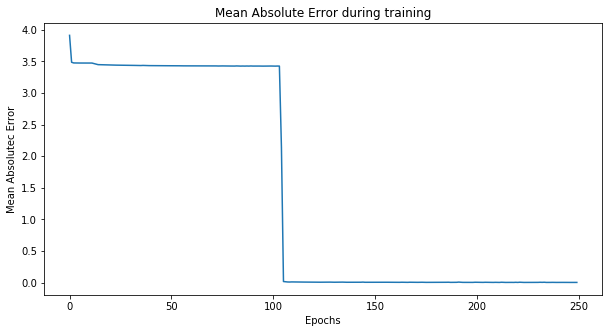

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.figure(figsize=(10,5))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);
plt.xlabel('Epochs')
plt.ylabel('Mean Absolutec Error')
plt.title('Mean Absolute Error during training')

plt.show()

#### 3. Model Evaluation

##### Outdoor Temprature and Humidity

In [ ]:
temp = pd.concat([(X_train.iloc[(len(X_train)-n_input):len(X_train),:]),X_test],axis = 0)

In [ ]:
temp.reset_index(drop = True,inplace = True)

In [ ]:
scaled_X_test =  X_scaler.transform(temp)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros((len(temp),4)), length=n_input, batch_size=b_size)
print(test_generator[0][0].shape)

(1, 2, 10)


In [ ]:
y_pred = model.predict(test_generator)

In [ ]:
y_pred

array([[68.30278 , 64.316025, 23.316502, 33.597473],
       [71.522484, 50.67619 , 22.295424, 36.19262 ],
       [67.522865, 64.51007 , 21.760206, 35.318844],
       [66.0043  , 54.84055 , 21.158838, 32.44144 ],
       [67.29188 , 49.022747, 23.791203, 29.275316],
       [64.30038 , 44.227257, 23.724916, 33.524982],
       [61.01706 , 47.585888, 23.458069, 36.609577],
       [60.827477, 46.9878  , 23.768665, 36.287415],
       [62.782215, 48.137268, 23.869032, 34.329987],
       [64.96626 , 49.08264 , 22.676596, 31.965778],
       [61.984734, 58.12803 , 22.298992, 37.334747],
       [64.82424 , 72.89285 , 22.915228, 33.366657],
       [65.206215, 53.60798 , 23.14024 , 32.31727 ],
       [67.35007 , 66.83926 , 22.786602, 32.878735],
       [68.02662 , 68.7986  , 21.515446, 32.907795],
       [65.35006 , 61.66562 , 21.877096, 34.139355],
       [58.936493, 43.255825, 22.133387, 28.566587],
       [60.23056 , 47.801037, 22.598082, 30.255255],
       [62.062668, 45.697567, 22.71521 , 33.92

In [ ]:
y_test['Pred_Outdoor_Temp'] = list(y_pred[:,0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
y_test['Pred_Outdoor_Humi'] = y_pred[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
y_test['Pred_Indoor_Temp'] = list(y_pred[:,2])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
y_test['Pred_Indoor_Humi'] = list(y_pred[:,3])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


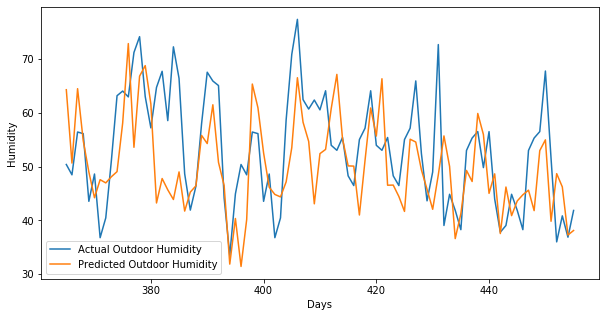

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test[['Relative Humidity','Pred_Outdoor_Humi']])
plt.xlabel('Days')
plt.ylabel('Humidity')
plt.gca().legend(('Actual Outdoor Humidity','Predicted Outdoor Humidity'))
plt.show()

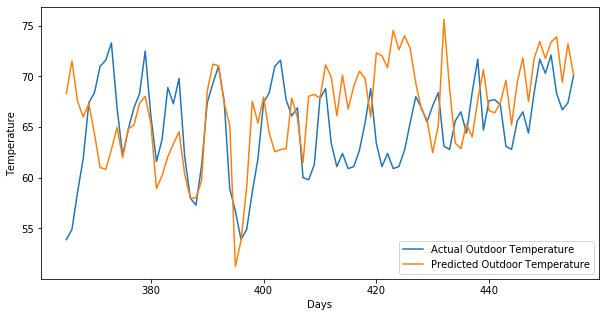

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test[['Temperature','Pred_Outdoor_Temp']])
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.gca().legend(('Actual Outdoor Temperature','Predicted Outdoor Temperature'))
plt.show()

#### Indoor Temperature and Humidity

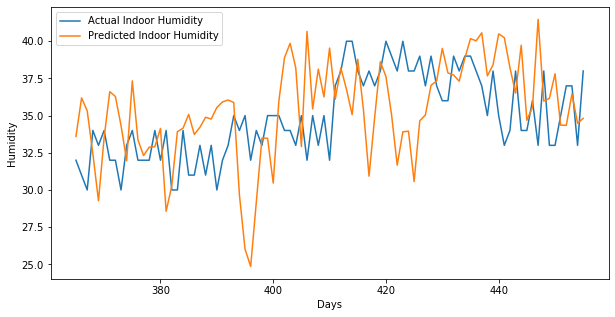

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test[['Indoor_Humidity','Pred_Indoor_Humi']])
plt.xlabel('Days')
plt.ylabel('Humidity')
plt.gca().legend(('Actual Indoor Humidity','Predicted Indoor Humidity'))
plt.show()

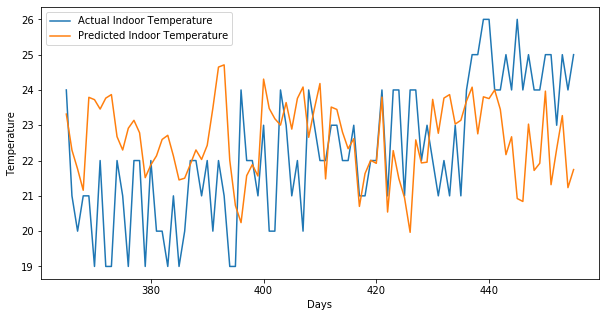

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test[['Indoor_Temperature','Pred_Indoor_Temp']])
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.gca().legend(('Actual Indoor Temperature','Predicted Indoor Temperature'))
plt.show()

#### 4. Creating Output Files

In [ ]:
data_2020.reset_index(drop = True,inplace = True)

In [ ]:
data_2020["Pred_Outside_Temp"] = list(y_test["Pred_Outdoor_Temp"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_2020["Pred_Outside_Humidity"] = list(y_test["Pred_Outdoor_Humi"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_2020["Pred_Indoor_Humidity"] = list(y_test["Pred_Indoor_Humi"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_2020["Pred_Indoor_Temp"] = list(y_test["Pred_Indoor_Temp"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_2020.to_csv("Results_for_year_2020.csv")

#### 5. Computing Additional Parameters

##### Absolute Errors

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print("Mean Absolute Error for outdoor temperature:")
print(mean_absolute_error(y_test["Temperature"], y_test["Pred_Outdoor_Temp"]))

Mean Absolute Error for outdoor temperature:
4.515231138795287


In [ ]:
print("Mean Absolute Error for outdoor humidity:")
print(mean_absolute_error(y_test["Relative Humidity"], y_test["Pred_Outdoor_Humi"]))

Mean Absolute Error for outdoor humidity:
7.972138036371588


In [ ]:
print("Mean Absolute Error for indoor temperature:")
print(mean_absolute_error(y_test["Indoor_Temperature"], y_test["Pred_Indoor_Temp"]))

Mean Absolute Error for indoor temperature:
1.706504633138468


In [ ]:
print("Mean Absolute Error for indoor humidity:")
print(mean_absolute_error(y_test["Indoor_Humidity"], y_test["Pred_Indoor_Humi"]))

Mean Absolute Error for indoor humidity:
3.0971947345104844


##### Root Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
print("Root Mean Square Error for outdoor temperature:")
print(math.sqrt(mean_squared_error(y_test["Temperature"], y_test["Pred_Outdoor_Temp"])))

Root Mean Square Error for outdoor temperature:
5.894125205486494


In [ ]:
print("Root Mean Square Error for outdoor humidity:")
print(math.sqrt(mean_squared_error(y_test["Relative Humidity"], y_test["Pred_Outdoor_Humi"])))

Root Mean Square Error for outdoor humidity:
9.912213303208462


In [ ]:
print("Root Mean Square Error for indoor temperature:")
print(math.sqrt(mean_squared_error(y_test["Indoor_Temperature"], y_test["Pred_Indoor_Temp"])))

Root Mean Square Error for indoor temperature:
2.1615940022450473


In [ ]:
print("Root Mean Square Error for indoor humidity:")
print(math.sqrt(mean_squared_error(y_test["Indoor_Humidity"], y_test["Pred_Indoor_Humi"])))

Root Mean Square Error for indoor humidity:
3.8445190289412188


##### Accurate Predictions

In [ ]:
x = pd.DataFrame(list(abs(y_test["Temperature"] - y_test["Pred_Outdoor_Temp"])),columns = ["diff"])

In [ ]:
print("Accuracy for outdoor Temperature:")
print(len(x[x["diff"]<=3])/len(x))

Accuracy for outdoor Temperature:
0.4175824175824176


In [ ]:
x = pd.DataFrame(list(abs(y_test["Relative Humidity"] - y_test["Pred_Outdoor_Humi"])),columns = ["diff"])

In [ ]:
print("Accuracy for outdoor Humidity:")
print(len(x[x["diff"]<=3])/len(x))

Accuracy for outdoor Humidity:
0.1978021978021978


In [ ]:
x = pd.DataFrame(list(abs(y_test["Indoor_Temperature"] - y_test["Pred_Indoor_Temp"])),columns = ["diff"])

In [ ]:
print("Accuracy for indoor Temperature:")
print(len(x[x["diff"]<=3])/len(x))

Accuracy for indoor Temperature:
0.8131868131868132


In [ ]:
x = pd.DataFrame(list(abs(y_test["Indoor_Humidity"] - y_test["Pred_Indoor_Humi"])),columns = ["diff"])

In [ ]:
print("Accuracy for indoor Humidity:")
print(len(x[x["diff"]<=3])/len(x))

Accuracy for indoor Humidity:
0.5164835164835165
